## Tarot card generator

## Setup

In [ ]:
# intalling from my gdrive - if *you* are not *me*, install from github
# requires a restart because of PIL upgrade
from google.colab import drive
drive.mount('/content/drive')
!pip install -e /content/drive/MyDrive/Projects/stable-tarot

In [1]:
%load_ext autoreload
%autoreload 2
# update - my custom class was too big to load on mobile, so I moved it to a library
from stabletarot import TarotGenerator

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
import torch
device = 'cuda'

from diffusers import StableDiffusionPipeline
base_pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                                    revision="fp16",
                                                    torch_dtype=torch.float16,
                                                    use_auth_token=True).to(device)
# we don't want inappropriate images, but this checker only gives false positives with these prompts
def dummy_checker(images, **kwargs): return images, False 
base_pipe.safety_checker=dummy_checker

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [4]:
tarot = TarotGenerator('Rad Things', pipe=base_pipe, device='cuda',
                       openai_key_path='/content/drive/MyDrive/keys/openaikey.txt')
tarot.generate_cards(
   starters=['A Jet Flyover', 'A Big Moon', 'Mountain Caves'],
model='davinci', temperature=0.85)
print(tarot.cards)

['A Dream Theater Album', 'An Abandoned Building', 'A Cat', 'An Arcade Game', 'Punk Rock', 'Chiptune Music', 'A Rollercoaster', 'The Milky Way', 'The Future of the Deck:', "I'm currently (as of 8/2011) looking into making a REAL Tarot deck. This would require hiring an artist to create original art for all 78 cards, and also designing small book which contains interpretations and meanings of each card. Above all else, creating such a deck will be extremely expensive - and I need to get enough support before I can do this."]


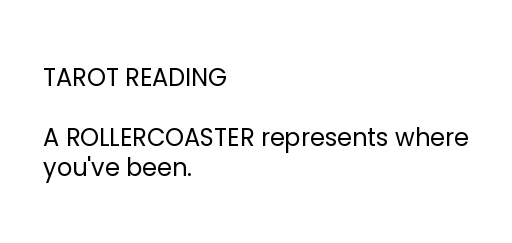

  0%|          | 0/81 [00:00<?, ?it/s]

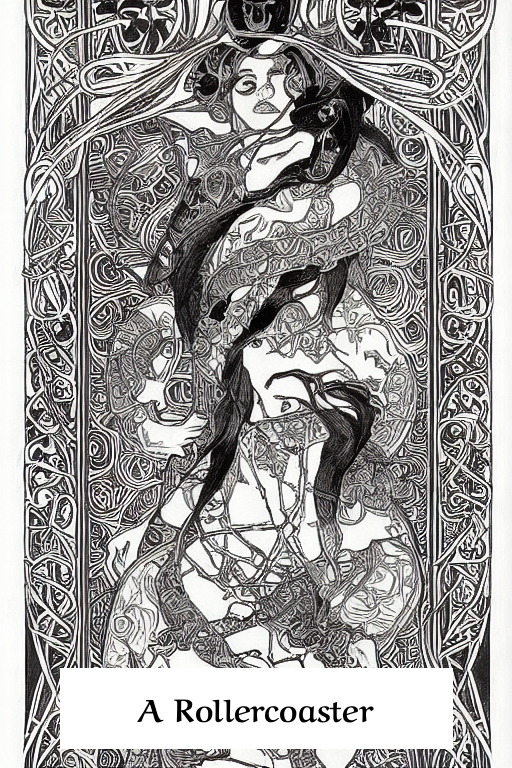

In [7]:
# all combined
ims = tarot.draw_and_gen(1, engine="curie", style='mucha', interpretations=True, steps=80, thermal_print=False)

# As a widget (for phone)

In [ ]:
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import HTML, display

def tarot_button_simple(theme, examples=""):
    tarot = TarotGenerator(theme, device=device, pipe=base_pipe,
                           openai_key_path='/content/drive/MyDrive/keys/openaikey.txt')
    starters = [x.strip() for x in examples.split(',')]
    tarot.generate_cards(starters=starters, model='davinci', temperature=0.85)
    deck_sample = ', '.join(tarot.cards[:4])
    display(HTML(f"This deck includes cards such as {deck_sample}..."))
    display(HTML("Drawing three cards..."))
    ims = tarot.draw_and_gen(3, engine="davinci", interpretations=True, steps=60, thermal_print=True)
    return ims

title = widgets.HTML(
    value="<h1 style='margin-top:300px;margin-bottom:50px'>Draw Tarot Cards from a Custom deck</h1>",
    placeholder='Some HTML',description=' ',)
padding = widgets.HTML(value="<div style='height:300px'>-</h1>", placeholder='',description=' ')

w = interactive(tarot_button_simple, {'manual': True}, theme='Chibi Puppies', example_cards="")
display(title, w, padding)

# Step by Step

In [7]:
tarot = TarotGenerator('Rad Things', device=device, pipe=base_pipe, openai_key_path='/content/drive/MyDrive/keys/openaikey.txt'))

In [8]:
tarot.generate_cards(
   starters=['A Jet Flyover', 'A Big Moon', 'Mountain Caves'],
model='davinci', temperature=0.85)
print(tarot.cards)

['A Cheeseburger', 'An Optical Illusion', 'The Ocean', 'A Supernova Explosion', 'Audrey Hepburn', "Lenny Kravitz' other eye", 'A Snail Car', 'Spinning Spirals', 'A Flock of Mountain Sheep', 'A Grand Canyon', 'The Human Brain', 'Extra-terrestrials (Extraterrestrial Intelligence)', 'A Montage of Self-Assembled Robots Walking', 'Reverse Kaleidoscopes', 'An Optimus Prime Transformation Sequence', 'Inverted Mountains', 'Magnetic Fields']


In [ ]:
cards = tarot.draw(3)
interpretations = tarot.interpretations(cards, engine='davinci')
tarot.generate_reading_img(cards, interpretations, fontsize=24, scale_height=True)

In [12]:
ims = []
thermal_print = True
for card in cards[2:]:
    im = tarot.generate_card_img(card,
                                style="mucha",
                                steps=80,
                                thermal_print=thermal_print)
    ims.append(im)
    display(im)

AttributeError: ignored

Tinkering with templates

In [ ]:
template = tarot.generate_card_img("The Puppy Empress", style=template, steps=60)